Ejercicio en clases: Calcular, graficar y obtener el valor de Chi Cuadrado para los siguientes generadores con las siguientes semillas:
- Cuadrados medios: Xo=74731897457, D=7
- Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19
- Tauswoth q=7, r=3, l=5
- Random de Python semilla (11052022)

# Librerias Necesarias

In [11]:
# Importanmos las librerias
import random
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
print('Librerias Importadas')

Librerias Importadas


In [70]:


def CuadradosMe(semilla,D,iteraciones):
    xo = semilla
    digitos = D
    iteraciones = iteraciones
    listrn=[]
    xn = xo
    #print("It. \t Xn \t Ui \t Rn")
    for i in range(iteraciones):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
        rn = ui / (int('9'*digitos)+1)
        listrn.append(rn)
        #print(str(i) + "\t" + str(xn) + "\t"+ str(ui)+"\t"+str(rn))
        xn = ui
    return listrn


def CongruenciaLin(semilla,a,b,m,iteraciones):
    xo = semilla
    a = a
    b = b
    m = m
    listUi=[]
    iteraciones = iteraciones
    xn = xo
    #print("It. \t Xn \t Ui")
    for i in range(iteraciones):
        xnn = (a*xn+b) % m
        ui = xnn/m
        listUi.append(ui)
        #print(str(i) + "\t"+ str(xnn)+"\t"+str(ui))
        xn = xnn
    return listUi


def Taus(r,q,Base_Binaria):
    R = r
    Q = q
    Binario = Base_Binaria
    listUi=[]

    def operacionXOR(a,b):
      ab = 1
      if a  == b:
        ab = 0
      return ab

    bits = []
    b = (2 ** Q) - 1

    for i in range(0,b):
      bits.append(0)

    #print(bits)

    for i in range(0, Q):
      bits[i] = 1
      bits.append(1)

    #print(bits)

    a = Q + 1
    for i in range(a,len(bits)):
      i1 = i - R
      i2 = i - Q
      bits[i] = operacionXOR(bits[i1],bits[i2])

    #print(bits)

    def binarioADecimal(binario):
      a = 0
      p = (Binario - 1)
      for i in range(0,len(binario)):
        if binario[i] == 1:
          a += 2**(p-i)
      return a
    test_list = bits

    def elementos(n, iterable, padvalue='1'):
        return zip_longest(*[iter(iterable)]*n, fillvalue=padvalue)

    #print("\n","It.", "\t", "Base 2", "\t","Base 10","\t","Ui","\n")
    d = 0
    for output in elementos(Binario, test_list):
        lst_new = [str(a) for a in output]
        listUi.append(binarioADecimal(output) / (2 ** Binario))
        #print(d,"\t"," ".join(lst_new), "\t", binarioADecimal(output), "\t", "\t", binarioADecimal(output) / (2 ** Binario))
        d +=1
    return listUi

def random_python(semilla,iteraciones):
  numeros = []
  random.seed(semilla)
  [numeros.append(random.random())for i in range(iteraciones)]
  return numeros


#CuadradosMe(74731897457,7,10)
#CongruenciaLin(4370,74731897457,37747318974,19,10)
#Taus(3,7,4)
#random_python(11052022,10)

# CHI-CUADRADO

In [59]:

#Defino una funcion para realizar un conteo de los numeros que caen dentro de cada intervalo
def calcular_chi(numeros ):
  tablas = {}
  for i in np.arange(0.1, 1.1, 0.1): # aqui separo en intervalos de 0.1
    for j in numeros:
      if j > i-0.1 and j <= i: # Compruebo si el valor esta dentro del intervalor
        tablas[round(i-0.1,1)] = tablas[round(i-0.1,1)]+1 if round(i-0.1,1) in tablas else 1
  return tablas
#defino una funcion para aplicar la formula y obtener la desviacion estandar de cada intervalo
def sumatoria_chi(tabla, E):
  return sum([(valor-E)**2/E for valor in tabla.values()])
#Defino una funcion para graficar en un cuadro de barras los valores de cada intervalo
def graficar(tabla,titulo):
  plt.bar(range(len(tabla)), list(tabla.values()), tick_label=list(tabla.keys()),)
  plt.title(titulo)
  plt.show()
# Listo eso es todo



Valor de Chi Cuadrado de Cuadrados medios
31.28571428571429


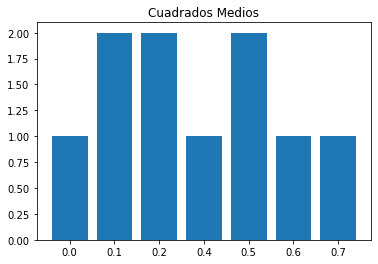

Valor de Chi Cuadrado de Congruencia Lineal
20.500000000000004


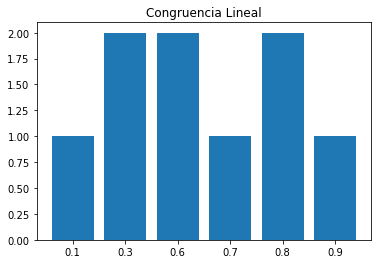

Valor de Chi Cuadrado de Tausworthe
48.3


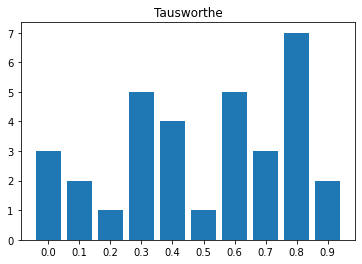

Valor de Chi Cuadrado de Random Python
31.285714285714285


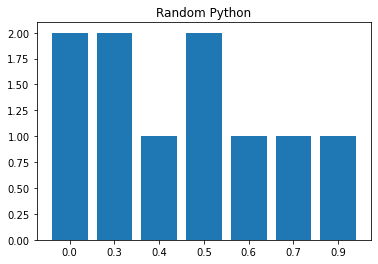

In [72]:
#Cuadrados medios
numerosCM=CuadradosMe(74731897457,7,10)
tablasCM=calcular_chi(numerosCM)
print('Valor de Chi Cuadrado de Cuadrados medios')
print(sumatoria_chi(tablasCM, len(tablasCM)))
graficar(tablasCM,'Cuadrados Medios')

#Congruencia Lineal
numerosCL=CongruenciaLin(4370,74731897457,37747318974,19,10)
tablasCL=calcular_chi(numerosCL)
print('Valor de Chi Cuadrado de Congruencia Lineal')
print(sumatoria_chi(tablasCL, len(tablasCL)))
graficar(tablasCL,'Congruencia Lineal')

#Tausworthe
numerosTa=Taus(3,7,4)
tablasTa=calcular_chi(numerosTa)
print('Valor de Chi Cuadrado de Tausworthe')
print(sumatoria_chi(tablasTa, len(tablasTa)))
graficar(tablasTa,'Tausworthe')

#Random Python
numerosRP=random_python(11052022,10)
tablasRP=calcular_chi(numerosRP)
print('Valor de Chi Cuadrado de Random Python')
print(sumatoria_chi(tablasRP, len(tablasRP)))
graficar(tablasRP,'Random Python')